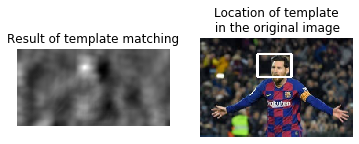

In [3]:
###################################
# Problem 1
###################################

import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

path= os.getcwd()
Img_path = os.path.join(path, 'images_1/messi.png')
template_path = os.path.join(path, 'images/template.png')

img = cv2.imread(Img_path)
template = cv2.imread(template_path)
w,h,channel=template.shape

result = cv2.matchTemplate(img,template,4)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#rectange dimensions
top_left_corner = max_loc
bottom_right_corner = (max_loc[0]+w,max_loc[1]+h)

cv2.rectangle(img,top_left_corner, bottom_right_corner, (255,255,255), 2)

plt.subplot(121)
plt.imshow(result,cmap = 'gray');
plt.axis("off")
plt.title('Result of template matching');

plt.subplot(122)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.axis("off")
plt.title('Location of template\n in the original image');

#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result1.png",dpi=300,bbox_inches='tight')


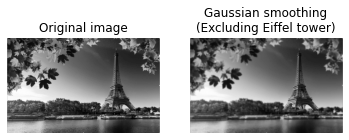

In [20]:
###################################
# Problem 2
###################################

import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

path= os.getcwd()
filename = os.path.join(path, 'images/eiffel.png')
img = cv2.imread(filename)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
w,h = img_gray.shape


### Programming task 1

#creating a mask on eiffel tower
mask_image = img_gray[150:950,1250:1700]
# Gaussian smoothing- except on eiffel tower
blur_img_gauss = cv2.GaussianBlur(img_gray, (0,0), 5)
blur_img_gauss[150:950,1250:1700]=mask_image

plt.subplot(121)
plt.imshow(img_gray,cmap = 'gray');
plt.axis("off")
plt.title('Original image')

plt.subplot(122)
plt.imshow(blur_img_gauss,cmap = 'gray');
plt.axis("off")
plt.title('Gaussian smoothing\n(Excluding Eiffel tower)');

#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result2.png",dpi=300,bbox_inches='tight')

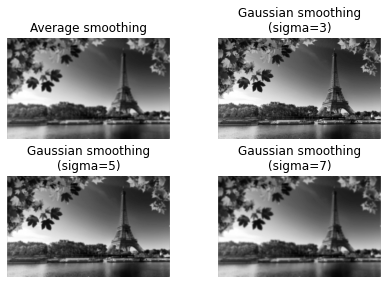

In [21]:
### Problem 2: Programming task 2

# Average smoothing on whole image
blurImg_avg = cv2.blur(img_gray, (21,21))

# Gaussian smoothing on whole image
def Gauss_Smooth(img,std_dev):
    img_copy = img.copy()
    blurImg_gauss = cv2.GaussianBlur(img_copy, (0,0), std_dev)
    return blurImg_gauss

sigma = [3,5,7]
Gauss_smooth_images = []
for i in range(len(sigma)):
    Gauss_smooth_images.append(Gauss_Smooth(img_gray,sigma[i]))

plt.subplot(221)
plt.imshow(blurImg_avg,cmap = 'gray');
plt.axis("off")
plt.title('Average smoothing')

plt.subplot(222)
plt.imshow(Gauss_smooth_images[0],cmap = 'gray');
plt.axis("off")
plt.title('Gaussian smoothing\n(sigma=3)');

plt.subplot(223)
plt.imshow(Gauss_smooth_images[1],cmap = 'gray');
plt.axis("off")
plt.title('Gaussian smoothing\n(sigma=5)');

plt.subplot(224)
plt.imshow(Gauss_smooth_images[2],cmap = 'gray');
plt.axis("off")
plt.title('Gaussian smoothing\n(sigma=7)');
plt.tight_layout(pad=1.0)

#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result3.png",dpi=300,bbox_inches='tight')

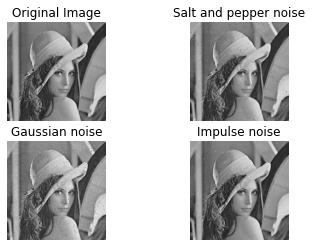

In [22]:
###################################
# Problem 3
###################################

import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import random

path= os.getcwd()
filename = os.path.join(path, 'images/lena.png')
img = cv2.imread(filename)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

### Programming task 1

# Function for salt and pepper noise
def salt_pepper(img):
    img_s_p = img.copy()
    w,h = img_s_p.shape
    no_of_white_pixels = random.randint(w/2,w)
    for i in range(no_of_white_pixels):
        x=random.randint(1,w-1)
        y=random.randint(1,h-1)
        img_s_p[x][y] = 255
        
    no_of_black_pixels = random.randint(w/2,w)
    for i in range(no_of_black_pixels):
        x=random.randint(1,w-1)
        y=random.randint(1,h-1)
        img_s_p[x][y] = 0
        
    return img_s_p

# Function for Impulse noise
def impulse(img):
    img_impulse = img.copy()
    w,h = img_impulse.shape
    no_of_impulse_pixels = random.randint(w/2,w)
    for i in range(no_of_impulse_pixels):
        x=random.randint(1,w-1)
        y=random.randint(1,h-1)
        img_impulse[x][y] = 255
        
    return img_impulse

# Gaussian noise
img_gauss = img_gray.copy()
cv2.randn(img_gauss, 0, 20)
noisy_img_gauss = img_gray+img_gauss

# Apply salt&pepper and impulse noise
noisy_img_sp = salt_pepper(img_gray)
noisy_img_impulse = impulse(img_gray)

plt.subplot(221)
plt.imshow(img_gray,cmap = 'gray')
plt.axis("off")
plt.title('Original Image')
plt.subplot(222)
plt.imshow(noisy_img_sp,cmap = 'gray')
plt.axis("off")
plt.title('Salt and pepper noise')
plt.subplot(223)
plt.imshow(noisy_img_gauss,cmap = 'gray')
plt.axis("off")
plt.title('Gaussian noise')
plt.subplot(224)
plt.imshow(noisy_img_impulse,cmap = 'gray')
plt.axis("off")
plt.title('Impulse noise');

#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result4.png",dpi=300,bbox_inches='tight')

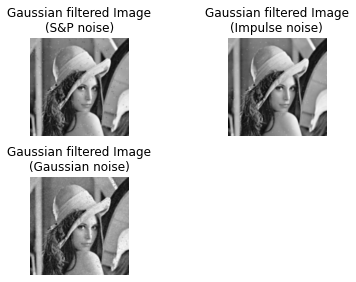

In [23]:
### Programming task 1: Gaussian filtering

GausFilt_img_sp = cv2.GaussianBlur(noisy_img_sp, (0,0), 1)
plt.subplot(221)
plt.imshow(GausFilt_img_sp,cmap = 'gray')
plt.axis("off")
plt.title('Gaussian filtered Image\n(S&P noise)')

GausFilt_img_impulse = cv2.GaussianBlur(noisy_img_impulse, (0,0), 1)
plt.subplot(222)
plt.imshow(GausFilt_img_impulse,cmap = 'gray')
plt.axis("off")
plt.title('Gaussian filtered Image\n(Impulse noise)')

GausFilt_img_gauss = cv2.GaussianBlur(noisy_img_gauss, (0,0), 1)
plt.subplot(223)
plt.imshow(GausFilt_img_gauss,cmap = 'gray')
plt.axis("off")
plt.title('Gaussian filtered Image\n(Gaussian noise)')
plt.tight_layout(pad=1.0)
#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result5.png",dpi=300,bbox_inches='tight')

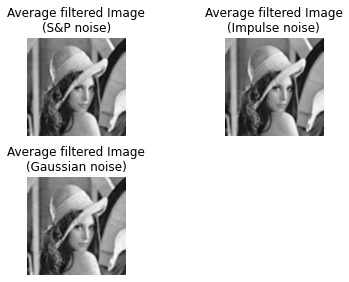

In [24]:
### Programming task 1: Average filtering

AvgFilt_img_sp = cv2.blur(noisy_img_sp, (5,5))
plt.subplot(221)
plt.imshow(AvgFilt_img_sp,cmap = 'gray')
plt.axis("off")
plt.title('Average filtered Image\n(S&P noise)')

AvgFilt_img_impulse = cv2.blur(noisy_img_impulse, (5,5))
plt.subplot(222)
plt.imshow(AvgFilt_img_impulse,cmap = 'gray')
plt.axis("off")
plt.title('Average filtered Image\n(Impulse noise)')

AvgFilt_img_gauss = cv2.blur(noisy_img_gauss, (5,5))
plt.subplot(223)
plt.imshow(AvgFilt_img_gauss,cmap = 'gray')
plt.axis("off")
plt.title('Average filtered Image\n(Gaussian noise)')
plt.tight_layout(pad=1.0)
#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result6.png",dpi=300,bbox_inches='tight')

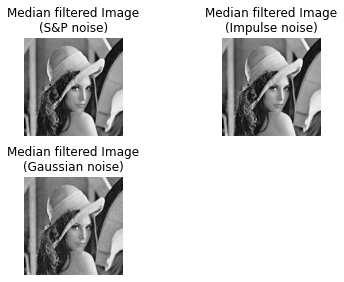

In [25]:
### Programming task 2: Median filtering

MedFilt_img_sp = cv2.medianBlur(noisy_img_sp,3)
plt.subplot(221)
plt.imshow(MedFilt_img_sp,cmap = 'gray')
plt.axis("off")
plt.title('Median filtered Image\n(S&P noise)')

MedFilt_img_impulse = cv2.medianBlur(noisy_img_impulse,3)
plt.subplot(222)
plt.imshow(MedFilt_img_impulse,cmap = 'gray')
plt.axis("off")
plt.title('Median filtered Image\n(Impulse noise)')

MedFilt_img_gauss = cv2.medianBlur(noisy_img_gauss,3)
plt.subplot(223)
plt.imshow(MedFilt_img_gauss,cmap = 'gray')
plt.axis("off")
plt.title('Median filtered Image\n(Gaussian noise)')
plt.tight_layout(pad=1.0)
#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result7.png",dpi=300,bbox_inches='tight')

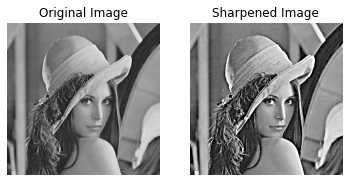

In [26]:
### Programming task 3: Image sharpening

alpha = 1
smooth_img = cv2.GaussianBlur(img_gray, (0,0), 3)
sharp_img = cv2.addWeighted(img_gray,(1+alpha),smooth_img,-alpha,0)

plt.subplot(121)
plt.imshow(img_gray,cmap = 'gray')
plt.axis("off")
plt.title('Original Image')
plt.subplot(122)
plt.imshow(sharp_img,cmap = 'gray')
plt.axis("off")
plt.title('Sharpened Image');
#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result8.png",dpi=300,bbox_inches='tight')

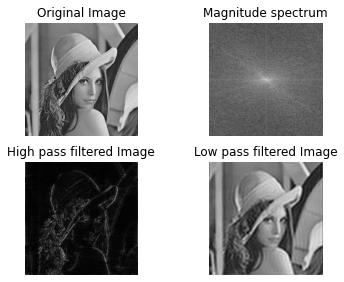

In [27]:
###################################
# Problem 4
###################################

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

path= os.getcwd()
filename = os.path.join(path, 'images/lena.png')
img = cv2.imread(filename)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

w,h = img_gray.shape
center_w,center_h = w/2,h/2
# Mask size for the filter
mask_size = 60 

#Apply fourier transform
dft_image = cv2.dft(np.float32(img_gray),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_image = np.fft.fftshift(dft_image)

#Magnitude spectrum
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift_image[:,:,0],dft_shift_image[:,:,1]))

plt.subplot(221)
plt.imshow(img_gray,cmap = 'gray')
plt.title('Original Image')
plt.axis("off")
plt.subplot(222)
plt.imshow(magnitude_spectrum,cmap = 'gray')
plt.title('Magnitude spectrum')
plt.axis("off")

# High pass filter (Removes low frequencies)
mask=np.ones((w,h,2),np.uint8)
mask[int(center_w-(mask_size/2)):int(center_w+(mask_size/2)), int(center_h-(mask_size/2)):int(center_h+(mask_size/2))] = 0

shifted_highPass_image = dft_shift_image*mask
highPass_image = np.fft.ifftshift(shifted_highPass_image)
inv_highPass_image = cv2.idft(highPass_image)
inv_highPass_image = cv2.magnitude(inv_highPass_image[:,:,0],inv_highPass_image[:,:,1])

plt.subplot(223)
plt.imshow(inv_highPass_image,cmap = 'gray')
plt.axis("off")
plt.title('High pass filtered Image')

# Low pass filter (Removes high frequencies)

mask=np.zeros((w,h,2),np.uint8)
mask[int(center_w-(mask_size/2)):int(center_w+(mask_size/2)), int(center_h-(mask_size/2)):int(center_h+(mask_size/2))] = 1

shifted_lowPass_image = dft_shift_image*mask
lowPass_image = np.fft.ifftshift(shifted_lowPass_image)
inv_lowPass_image = cv2.idft(lowPass_image)
inv_lowPass_image = cv2.magnitude(inv_lowPass_image[:,:,0],inv_lowPass_image[:,:,1])

plt.subplot(224)
plt.imshow(inv_lowPass_image,cmap = 'gray')
plt.axis("off")
plt.title('Low pass filtered Image');
plt.tight_layout(pad=1.0)
#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result9.png",dpi=300,bbox_inches='tight')

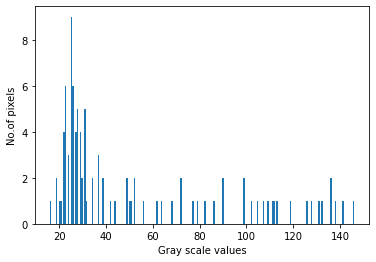

In [28]:
###################################
# Problem 5
###################################

import cv2 
import numpy as np
import matplotlib.pyplot as plt

path= os.getcwd()
filename = os.path.join(path, 'images/messi.png')
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def IntegralHistogram(image, Flag = False):
    """
    Parameters
    ----------
    Flag : For doing task 2, we need to consider only 10 X 10 size

    Returns
    -------
    Histogram : Integral Histogram
    list_pixels : Gray scale values of each pixel
    """
    list_pixels = [] #list to take pixel values
    Histogram = [] # Integral Histogram
    if Flag == False:
        width, height = image.shape
        for i in range(width):
            for j in range(height):
                list_pixels.append(image[i, j])
    else:
        for i in range(10):
            for j in range(10):
                list_pixels.append(image[i, j])
                
    Index = [i for i in range(256)]
    for i in Index:
        Histogram.append(list_pixels.count(i))
    return Histogram, list_pixels

IntegralHistogram(gray)

#Task2
Histogram, list_pixels = IntegralHistogram(gray, True)
q25, q75 = np.percentile(list_pixels,[.25,.75])
binwidth = 2*(q75 - q25)*len(list_pixels)**(-1/3)
bins = int(round((max(list_pixels) - min(list_pixels))/binwidth))
plt.hist(list_pixels, bins = bins )
plt.show
 
plt.xlabel('Gray scale values')
plt.ylabel('No.of pixels')

#Save image (Uncomment the line to save)
#plt.savefig("./Results/Result10.png",dpi=300,bbox_inches='tight')